In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw6.ipynb")

# Homework 6: Exploring Uber and Lyft Prices in Boston

Name: Emily Zeiberg

Student ID: 498464

Collaborators:


## Instructions

This homework is an _open-ended midterm project_ for our class. 

We will be using the techniques and approaches introduced in the first half of the semester:

* **[M0] Python for DS**
* **[M1] The DS and ML Workflows**
* **[M2] Exploratory Data Analsyis**
* [M3] Linear Regression (if applicable - depends on problem/dataset)
* [M4] Linear Classification (if applicable - depends on problem/dataset)
* [M5] Sentiment Analysis (if applicable - depends on problem/dataset)
* **[M6]** Learning Principles and **Ethical Thinking for DS**

The main focus of this project is on the first three modules [M0]-[M2], as well as the ethical consderations for DS from [M6]. In particular, it will be helpful to review **Lab 2 & hw2 (Analyzing the MoMA Data)** first. Most of the things you will do in this midterm project are explained in `Lab2` and `hw2`. Then, review the other labs and hws to recap the  general workflow of our DS approaches to the various problems we have worked on so far. This will help you to be prepared for all the steps in this project, so that you do not miss anything. 

In gernal, you should feel free to import any package that we have previously used in class. Ensure that all plots have the necessary components that a plot should have (e.g. axes labels, a title, a legend). However, **do not install and use other packages from what we have set up in our cse217a conda environment!**

Additionally, note that this assignment is more like a project than a typical homework and it will have a slightly different structure than the hws in the past. One of the reasons why Jupyter Notebooks are so popular in the field is because you can really treat them like notebooks to explain your findings as you discover them. In this assignment, we provide some **Problem** stubs following the EDA/DS workflow and you will need to fill in the analysis and structure as you go.

Furthermore, in addition to recording your collaborators on this homework, please also remember to cite/indicate all external sources used when finishing this assignment. This includes peers, TAs, and links to online sources. 

Frequently **save** your notebook!

### Collaborators and Sources
Furthermore, in addition to recording your **collaborators** on this homework, please also remember to **cite/indicate all external sources** used when finishing this assignment. 
> This includes peers, TAs, and links to online sources. 

Note that these citations will not free you from your obligation to submit your _own_ code and write-ups, however, they will be taken into account during the grading and regrading process.

In [2]:
# collaborators and sources:
# Albert Einstein and Marie Curie
# https://developers.google.com/edu/python/strings

# your code here
answer = 'R^2 info: https://help.desmos.com/hc/en-us/articles/202529139-Why-am-I-seeing-a-negative-R-2-value-#:~:text=In%20practice%2C%20R2%20will,the%20mean%20of%20the%20data.'
answer2 = 'Uber surge pricing: https://www.uber.com/us/en/drive/driver-app/how-surge-works/'

### Submission instructions
* Submit this Python notebook, including your answers in the code cells as homework submission.
* **Feel free to add as many cells as you need to** — just make sure you don't change what we gave you. 
* **Does it spark joy?** Note that you will be partially graded on the presentation (_cleanliness, clarity, comments_) of your notebook so make sure you [Marie Kondo](https://lifehacker.com/marie-kondo-is-not-a-verb-1833373654) your notebook before submitting it.

## 1. Introduction

For our midterm project this semester, we'll take a look at data for numerous Lyft and Uber rides in Boston and their prices (https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma). Our goal will be to use this dataset to gain some insight about characteristics of rides and _perhaps_ find some patterns in this data.

In general, we will be following the EDA process:
1. Get the data and gain **basic understanding**
2. **Wrangle** the data
3. **Profile** the data
4. Develop questions to investigate (form a **hypotheses**)
5. Use the data to **investigate** hypothesis
6. **Summarize** results and answer questions 
7. **Critically review** our workflow and discuss ethical concerns

## 2. Getting Familiar with the Data

In this section, we will get a feel for our data and tidy it up so that we can analyize it later. 
Download the data from the source/link given above and be sure to save the data in a folder called `data` under the `utility` directory. Your final path should look like `utility/data/rideshare_kaggle.csv` -- if it doesn't **we will not be able to properly grade your assignment!**

<!-- BEGIN QUESTION -->

### Problem 1

Let's take a look at the file in `utility/data` and think about what we can and will need to do with it.

**Write-up!** Describe the data, answering questions including, but not limited to, these: Where does the data come from? How was it obtained? How many examples and features does the dataset have? What kinds of features are in the dataset? What values can these features take?
> **Hint**: Consider the steps of EDA; what would you like to know about this dataset. 

This data was downloaded from Kaggle. It is a csv file that I imported as a pandas dataframe to be used for processing and analyzing. This set contains information about Uber and Lyft rides in Boston, MA. It has 693071 examples with 57 features (including 1 that I will use as a target). A lot of the features are related to weather, the date/time of the ride, ride locations, and price. The features take values of datetime, integers, floats, and strings.

In [3]:
#import packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

from utility.util import configure_plots
configure_plots()

In [4]:
configure_plots()

In [5]:
rides = pd.read_csv("utility/data/rideshare_kaggle.csv") #reading csv file and storing it in a dataframe
#rides.head()

### Problem 2

Let's do some data wrangling. 

**Write up!** Considering your description of the dataset from [Problem 1](#Problem-1), how should we clean this data?

**Do this!** In the cells below, **explain** and perform the steps that you need to prepare this data for further analysis. Make sure that your implementations and write-ups (for processing and analysis) are presented well and effectively describe your workflow. You may add comments or markdown cells for your documentation as you see fit!  

*Grading Note: Your work will be graded for _readability_, _style_, and _cleanlines_. So, carefully document your code and use descriptive/intuitive variable names. For write-ups use consice and clear language like in a written project report.*

> **Hint**: You can use our previous labs as examples of how you might do this. 
Also, you might want to come back to this step later on, since you might encounter problems with the data once you actually analyze it. Remember, you may add as many cells (for code and text) as you need below. Here — we gave you one for free!

I should clean the data by removing any example with a value of NA since the page on Kaggle says this dataset has a lot of NA values. I should also make sure the datetime column takes a datetime data type. I'm also removing the day and month columns since all of that data is contained within 'datetime'. Also, timezone is removed since all of these datapoints are taken in Boston. I'm changing information in datetime just to the date (not the including the time) because I am more interested on the days each ride occured, and the hour column will still have information about the time. This is simpler because I care about the hour of the time more than the minute. 

In [6]:
not_null_rows = pd.notnull(rides["price"]) # Get all rows that are not null 
rides = rides[not_null_rows]
rides['datetime'] = pd.to_datetime(rides['datetime']).dt.date #Ensuring 'datetime' is datetime data type and just keeping the date
rides_new = rides[['id', 'timestamp', 'hour', 'datetime',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime']] #Getting rid of excess columns


### Problem 3

**Do this!** Now that we cleaned up our data, we are ready to look into it. In this problem, we want to profile our data and explore its variables.

> **Hint**: Note that the way some data is stored does not necesarily mean that each column should correspond to a seperate variable. Feel free to define your own variables based on the input data. Looking at the dataset documentation might be helpful to figure out meaningful representations. Also note that there are no right or wrong representations here (since it is your job to find something interesting in the data, it is also up to you to choose the data/variable representations). Again, you might want to iterate over this step again later after doing some more exploration. 

> **Hint**: Recall from Lab 2, this step usually involves computing summary statistics and basic plots _where applicable_. Try plotting some of the data (with appropriate plots; remember the lecture content - some plots introduced in there ( we did not yet use in the lab or hw) could be useful). Then, highlight a few of the more interesting ones and discuss why you thought they were interesting — for both our sakes, **please only include the most interesting ones** in your actual submission!!  Again note that there are no right or wrong features to choose here (since it is your job to find something interesting in the data, it is also up to you to choose the data/variables to include). Just be sure to make a selection. You will not receive any credit by simply plotting everything!  

*Grading Note*: Your work will be graded for _creativity_ and _aesthetics_. Be creative in the plots you use and select visulatizations and colors that make for a plesant and intuitive viewing expereince. The goal of a good visualization is that the viewer will quickly understand your figures.* 

Once again, we have provided a _free_ cell for you to use; make as many as you need. Use text/markdown cells to describe what you are doing and what your findings are. 

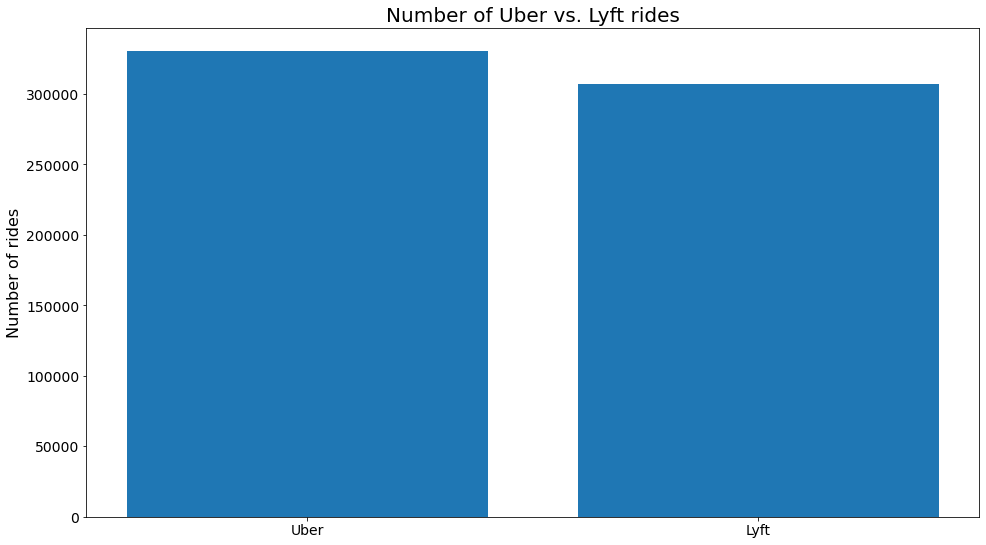

In [7]:
# Bar plot
plt.bar(rides_new['cab_type'].value_counts().keys(),rides_new['cab_type'].value_counts().values)
plt.title("Number of Uber vs. Lyft rides")
plt.ylabel("Number of rides")
plt.show();

The above plot shows that more samples were taken from Uber than from Lyft. This may suggest that Uber is more popular than lyft in Boston, but I don't have enough information about how this data was collected to properly make that conslusion. Although more data points are from Uber, the number of samples for each is sufficient enough to make fair comparisons.  

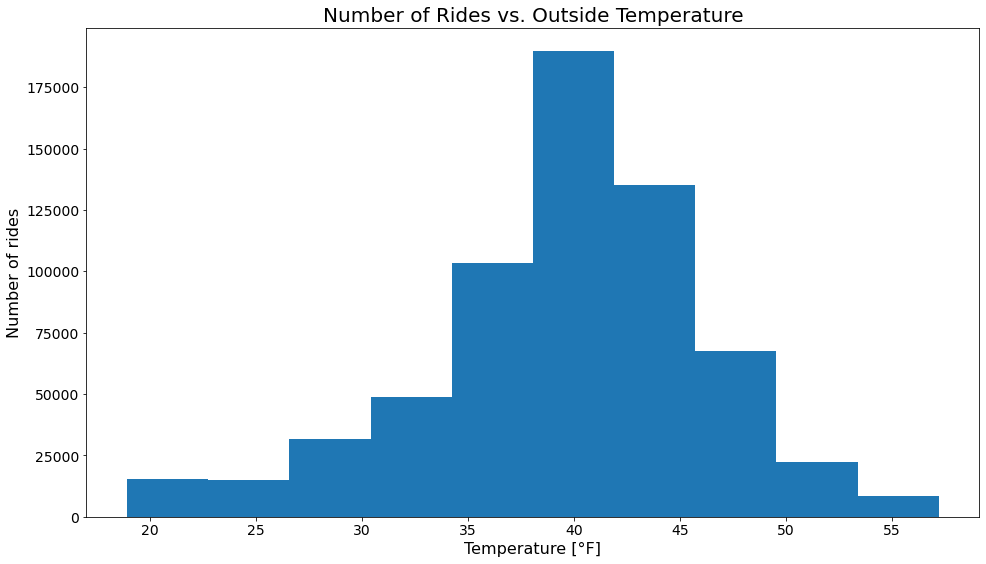

In [8]:
#Number of rides for each temperature
plt.hist(rides_new['temperature'], bins=10)
plt.title("Number of Rides vs. Outside Temperature")
plt.ylabel("Number of rides")
plt.xlabel("Temperature [°F]")
plt.show();

The above plot shows that most common temperature for the rides was 40°.

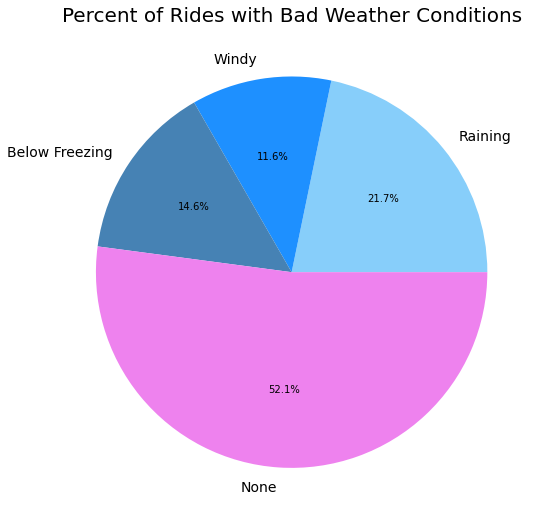

In [9]:
rides_with_rain = rides_new[rides_new['precipIntensity']!= 0] #df of rides when it was raining
number_rain = int(rides_with_rain.shape[0]) #number of rides when it was raining
percent_rain = number_rain/rides_new.shape[0] #percent of rides when it was raining

rides_with_wind = rides_new[rides_new['windSpeed'] > 10] #df of rides when it was windy
number_wind = int(rides_with_wind.shape[0]) #number of rides when it was raining
percent_wind = number_wind/rides_new.shape[0] #percent of rides when it was windy

rides_with_freeze = rides_new[rides_new['temperature'] < 32] #df of rides when it was windy
number_freeze = int(rides_with_freeze.shape[0]) #number of rides when it was raining
percent_freeze = number_freeze/rides_new.shape[0] #percent of rides when it was freezing

labels = 'Raining', 'Windy', 'Below Freezing', 'None'
sizes = [percent_rain, percent_wind, percent_freeze, 1 - percent_rain - percent_wind - percent_freeze]

sectionColors = ['lightskyblue', 'dodgerblue', 'steelblue','violet']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=sectionColors)
plt.title('Percent of Rides with Bad Weather Conditions')
plt.show()

The above plot shows that 48% of rides were when it was windy, freezing, and/or raining. This makes sense since people are willing to pay for rides if the weather conditions are not ideal for walking, but there are more times when weather conditions are ideal and people still need rides. 

Text(0.5, 0, 'hour')

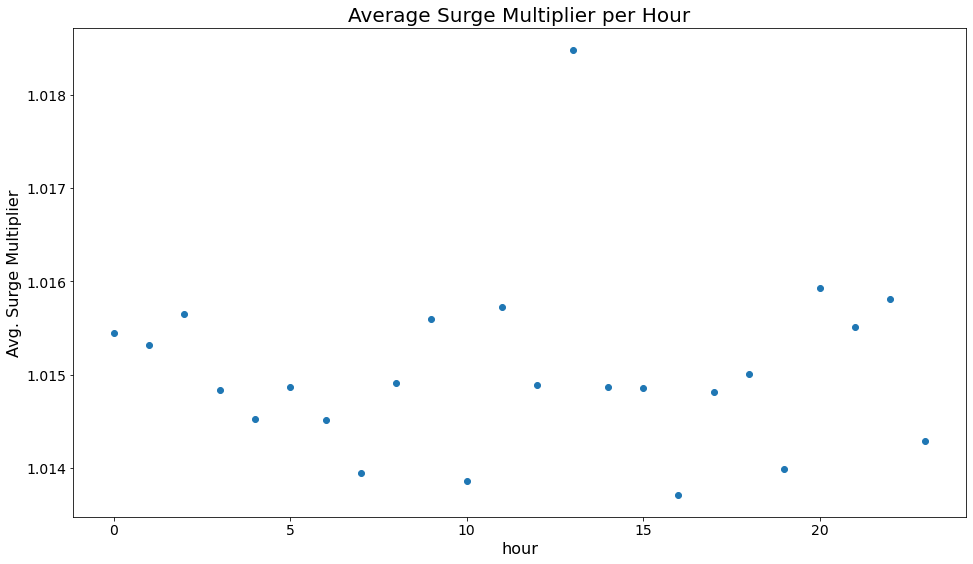

In [10]:
by_hour = rides_new.groupby('hour').mean() #group rides by hour of the day and calculate mean value
hours = range(24)
plt.scatter(hours, by_hour['surge_multiplier'])
plt.title('Average Surge Multiplier per Hour')
plt.ylabel('Avg. Surge Multiplier')
plt.xlabel('hour')

The above plot shows that there are some hours that on average have a higher surge multiplier than others, but the difference between the surge multipliers is not that big. If there is a relation, it's non linear, so a  linear regression model would not be a good predictor of it.

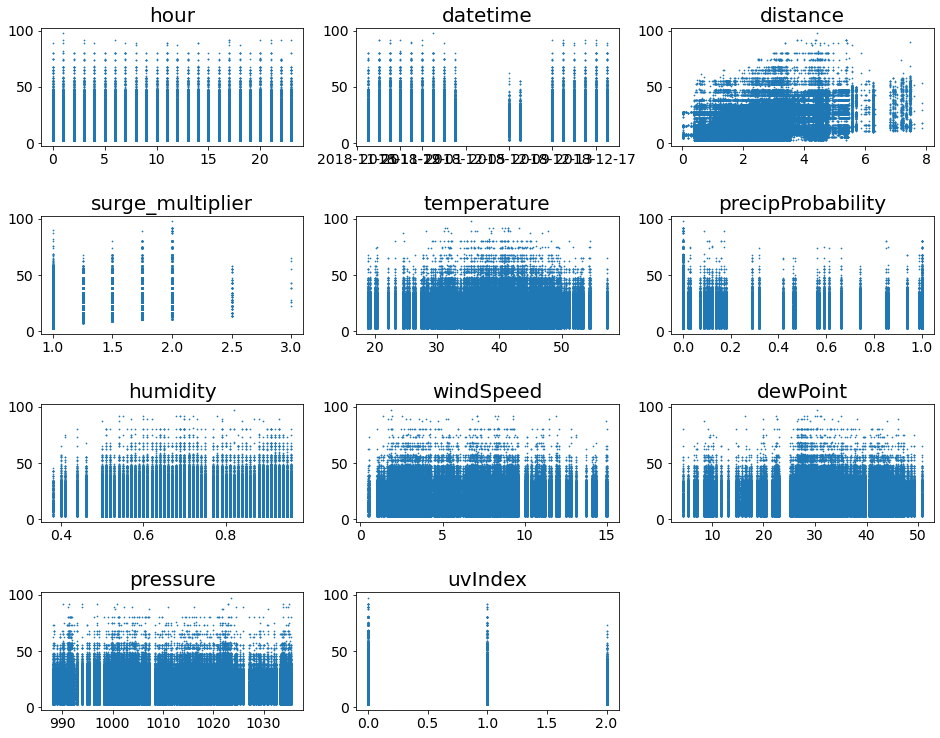

In [11]:
f = plt.figure(figsize=(16, 16))
f.subplots_adjust(hspace=0.6)

feature_names = ['hour', 'datetime',
       'distance', 'surge_multiplier', 'temperature',
       'precipProbability', 'humidity', 'windSpeed',
       'dewPoint', 'pressure', 'uvIndex',]
# visualize the relationship of all varaibles with price 
for index, feature_name in enumerate(feature_names):
    ax = f.add_subplot(5, 3, index + 1)
    ax.scatter(rides_new[feature_names[index]], rides_new['price'], s=0.5)
    ax.set_title(feature_name)
    
plt.show()


The above plots show the relationship between price and the other key features. 

## 3. Asking the Hard Questions

By now we should know all of the ins and outs about this dataset (right?). Let's dive a little deeper into it and see if we can find anything interesting.

### Problem 4

As you worked through the initial data processing and understanding phase, did anything catch your interest? Let's formulate some questions and hypotheses that you could explore in depth.

**Write-up!** Formulate and describe a question you have/want to investigate. Then, formulate and describe a hypothesis that can (possibly) answer it. What inspired your idea (provide specifics from [the last section](#2.-Getting-Familiar-with-the-Data), if any)? How can you use the data to support or reject your hypothesis?

> **Hint**: Your question/hypothesis might be something that you are personally interested in or something that you think might lead to a product or service for users/customers. You might want to think about something that could help others in making decisions, etc.

*Grading Note: Your work will be graded for _creativity_. Be creative in the questions you ask/hypothesis you pose.* 

I want to investigate making a linear regression model that predicts the price based off distance. I want to do this because price and distance seem to be positively correlated in the above plots, so distance should be a good indicator of price. My hypothesis is that distance is a good predictor of price but there will still be some error since the plot above is not perfectly linear. I will test this by creating a linear regression model to predict the price based on distance. This data can support my hypothesis if the r^2 value is close to one. I will also make a plot of the training data and my model's predictions to see if the model predicted the overall relationship. 

### Problem 5

**Do this!** Let's explore your hypothesis. Find evidence from the data that supports or refutes your hypothesis and present it — recall that as a data scientist, one of your goals is to discover and communicate your results to your audience, _me_. The more thorough your analysis, the better!

> **Hint**: Even though we focus on EDA here, you may include some predictive modeling here as well. 

Here's yet another _free_ cell; use as many as you need.

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [13]:
#defining feature and target
X = np.array(rides_new['distance'])
y = np.array(rides_new['price'])

In [14]:
from sklearn.model_selection import train_test_split

#Model using hour as feature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10) #creating test and train dataset

#reshaping arrays
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

model.fit(X_train, y_train) #fit model

# Get the model parameters
b = model.intercept_
w = model.coef_
print(b)
print(w)


10.335371064257306
[2.83465688]


In [15]:
y_pred = model.predict(X_test)

In [16]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
f'r^2: {r2}'

'r^2: 0.11893805845264582'

Text(0.5, 1.0, 'Comparing Training Data to Model Predictions')

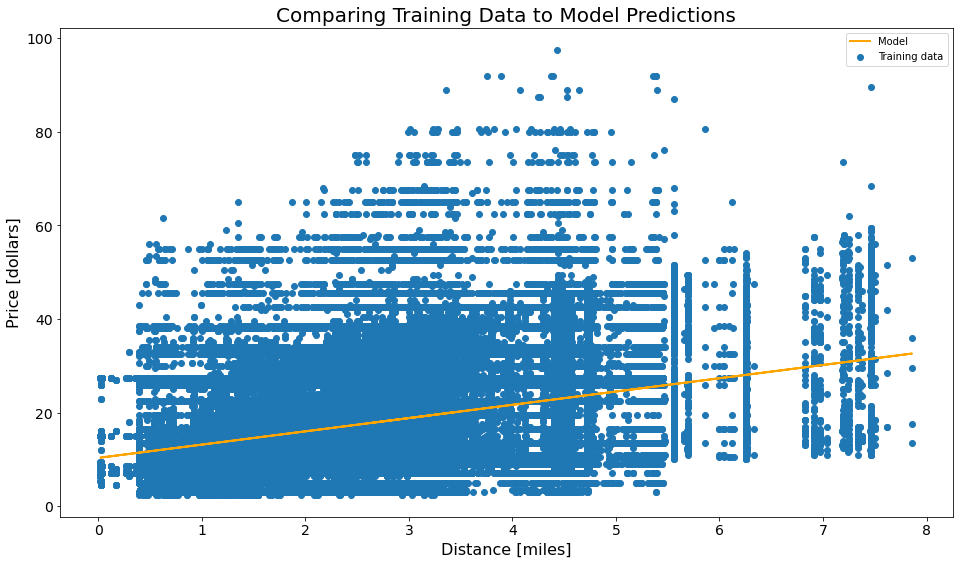

In [17]:
plt.scatter(X_train, y_train, label='Training data')
plt.plot(X_test, y_pred, color="orange", label='Model')
plt.legend()
plt.xlabel('Distance [miles]')
plt.ylabel('Price [dollars]')
plt.title('Comparing Training Data to Model Predictions')

### Problem 6

**Write up!** Did you find anything interesting in [Problem 5](#Problem-5)? If you did, tell me about it. If you don't think you found anything interesting, keep looking. 

> **Hint**: Provide links to key figures in your discussion. See [this StackOverflow question](https://stackoverflow.com/questions/28080066/how-to-reference-a-ipython-notebook-cell-in-markdown) for details.

Parts of my hypothesis were correct. Distance does not seem to be a good indicator of price since the coefficient of determination, r^2 value, was close to zero. However, from the graph, the model seems to predict the overall trend in the data. I think the r^2 value is so small because I only had the model make predictions based on distance, but there are many factors that affect the price of the ride. I could make a model that makes predictions on more than one feature, but based on my summary plots from before, no other feature seems to have a linear relationship with price, so I don't think these features will improve my model. 

I also want to explore how the price of uber vs lyft compare. Uber and lyft are competitors, so I expect them to have similar pricing. However, from personal experience, Lyft typically has a cheaper price. My new hypothesis is that Uber will be a bit more expensive then Lyft when comparing their average daily price. To test this, I will divide the data by cab_type then find the average price each day for both Uber and Lyft. I will make a scatter plot to visualize my results. Since price is also affected by surge mulitplier, I will also find the average daily surge multiplier for both Uber and Lyft to see if one company has higher mark ups.

Text(0, 0.5, 'Price [dollars]')

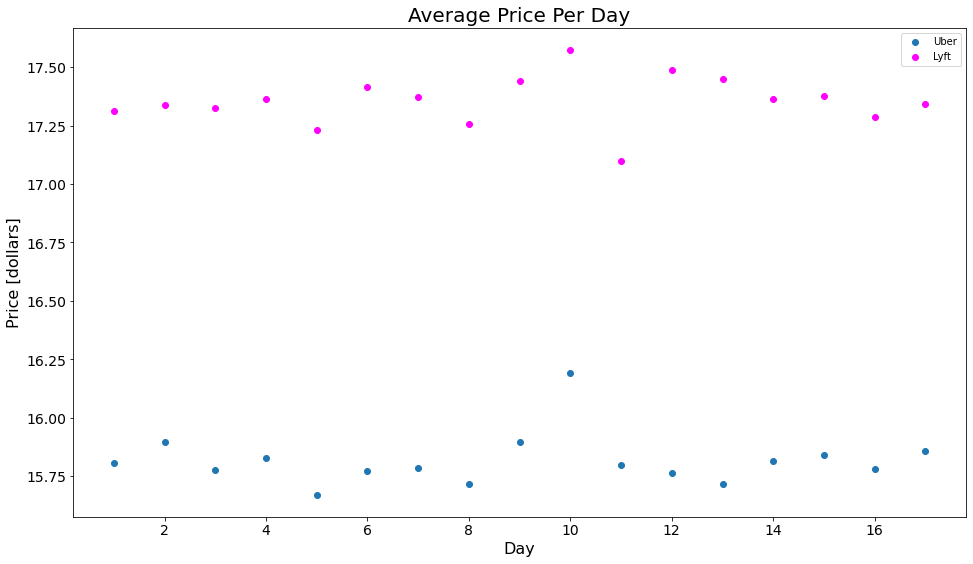

In [18]:
#Is Uber or Lyft more expensive?

#Uber data
rides_uber = rides_new[rides_new['cab_type'] == 'Uber']
by_day_uber = rides_uber.groupby('datetime').mean()
days = range(1,18)
plt.scatter(days, by_day_uber['price'])

#Lyft data
rides_lyft = rides_new[rides_new['cab_type'] == 'Lyft']
by_day_lyft = rides_lyft.groupby('datetime').mean()
plt.scatter(days, by_day_lyft['price'], color='magenta')

plt.legend(['Uber','Lyft'])
plt.title('Average Price Per Day')
plt.xlabel('Day')
plt.ylabel('Price [dollars]')

Text(0, 0.5, 'Surge Multiplier')

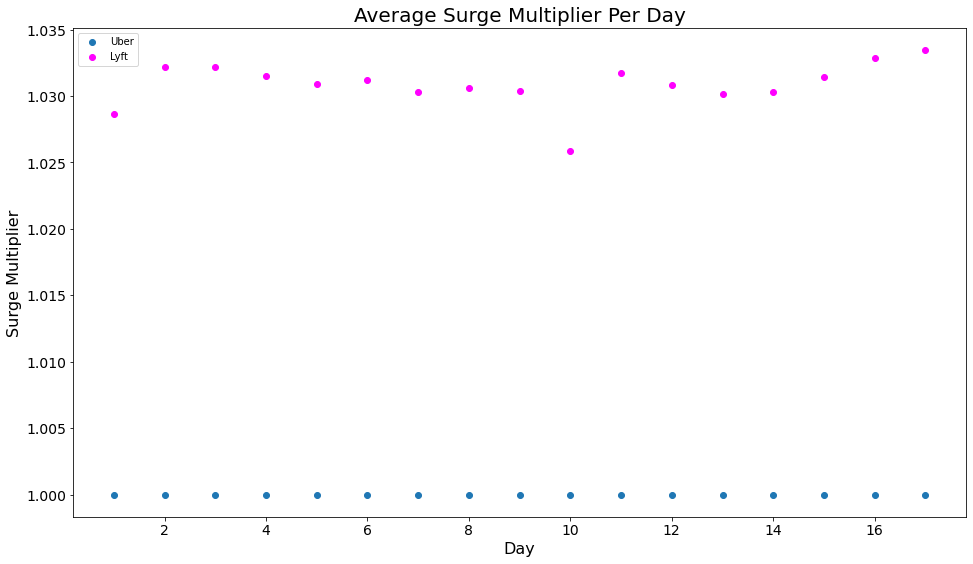

In [19]:
#Does Uber of Lyft have a higher surge multiplier on average?

#Uber data
by_day_uber = rides_uber.groupby('datetime').mean()
plt.scatter(days, by_day_uber['surge_multiplier'])

#Lyft data
by_day_lyft = rides_lyft.groupby('datetime').mean()
plt.scatter(days, by_day_lyft['surge_multiplier'], color='magenta')

plt.legend(['Uber','Lyft'])
plt.title('Average Surge Multiplier Per Day')
plt.xlabel('Day')
plt.ylabel('Surge Multiplier')

My hypothesis was wrong. On every day data was collected, Lyft was more expensive. I think one of the reasons my hypothesis is wrong is because I have not used these apps in Boston, so the number of drivers/demand is different for each app, causing the pricing to be different than in St. Louis. These results are interesting to me since Lyft is about $1.50 more expensive each day. Although this is not a significant amount, if someone is using rideshare every day, this price difference adds up. I would expect the prices to be more similar since the companies are competitors, so people can easily switch to the other company if they see it has lower prices. 

My average surge multiplier vs. day plot shows that none of the Uber rides have a surge multiplier. This plot makes me wonder how accurate this data set is. I know from personal experience that Uber uses surge multipliers, since I have gotten warnings in the app before that the price is higher than normal due to increased demand. Also, on Uber's website, they specifically say they use surge pricing, which the data set does not show.  

### Problem 7
One last step that we shouldn't skip is reviewing both our data analysis approach and also the data acquisition method. 

**Write up!** Are there any shortcommings and/or **ethical issues** related to the way you used this data or formed your conclusions?
* Who are the stakeholders?
* How could someone other than yourself be impacted by any ethical issues arising from your analysis/work/product?
* Can you propose a way to resolve the issue(s)?

The stakeholders are Uber, Lyft, and the users of the app. Uber and Lyft can decide how to price their rides and when they have greater demand using this data. Users are affected by the pricing, and if the price is too high, they may decide not to use a rideshare app at the moment. I did not consider any ethical issues when forming my conclusions since my conclusions were not based on personal information about the users such as race, gender, or class. However, I don't have details about how the data was collected, so there may be some ethical issues in the collection methods. For example, if the data was collected in only wealthier neighborhoods, the data would be biased. Although there is information about where each of the rides took place, I do not have enough knowledge about the average income of each of the neighborhoods to determine if there is bias. If this issue did happen, more data should be collected in lower income neighborhoods.

Let's conclude with thinking about imporvements for the future! 

**Write up!** There are often times where the data you need doesn't exist (yet) and you need to go collect it. Based on your analysis of the data set, which features were informative and which weren't? What information that was missing from this dataset do you think would be helpful to have for next time?

The information about UV index, humidity, and due point was not informative for me. I feel that this information could be inferred from other features, such as temperature and precipitation. Also, the day and month columns were not of interest since I had this information contained in datetime. It would be useful to have more features that are linearly related to price so that I could improve my model's predictions. However, this is hard to do since the relationship isn't known until the data is collected and analyzed. I think it would also be nice to have data about how long the wait time was for each of the rides. It would be interesting to compare if a longer wait time corresponded to a cheaper or more expensive fare. A longer wait would mean greater demand, which can mean a higher price, but a longer wait time also means more inconvenience to the user, which would indicate a lower price, so it would be interesting to see how these apps deal with these issues. 

And that's it! Remember to review your work and make sure it is well presented and organized. Not everyting you coded up needs to remain in your submission. **[Does [this cell] spark joy?](https://i.kinja-img.com/gawker-media/image/upload/s--iW_3HGbT--/c_scale,dpr_2.0,f_auto,fl_progressive,q_80,w_800/oruf4oavtj5vpmvaquew.jpg)** You are always trying to communicate your findings to somebody, _maybe even yourself_. 

> **Final Grading Note/Reminder**: Your work will be graded for _creativity_, _aesthetics_, _readability_, _style_, and _cleanlines_. So, carefully document your code and use descriptive/intuitive variable names. For write-ups use consice and clear language like in a written project report. Be creative in the questions you ask/hypothesis you pose as well as in the plots you use and select visulatizations and colors that make for a plesant and intuitive viewing expereince. The goal of a good visualization is that the viewer will quickly understand your figures. 

In [20]:
grader.check("hw6")

hw6 results: All test cases passed!

<!-- END QUESTION -->



---

To double-check your work, the cell below will rerun all of the autograder tests.

In [21]:
grader.check_all()

hw6 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [22]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)